#  Data Preparation

In [3]:
import pandas as pd
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Load the dataset
file_path = 'spam/spam.csv'  # Update this path
spam_data = pd.read_csv(file_path, encoding='latin-1')

# Dropping irrelevant columns and renaming columns for clarity
spam_data_cleaned = spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
spam_data_cleaned.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

# Display the first few rows of the cleaned data
print(spam_data_cleaned.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Text Preprocessing: Tokenization and Removing Stop Words

In [5]:

# Function for tokenizing and removing stop words
def preprocess_text(text):
    # Tokenizing the text
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    return " ".join(filtered_tokens)

# Applying the function to the email texts
spam_data_cleaned['text_processed'] = spam_data_cleaned['text'].apply(preprocess_text)

# Displaying the original and processed texts for comparison
print(spam_data_cleaned[['text', 'text_processed']].head())


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      text_processed  
0  Go jurong point , crazy .. Available bugis n g...  
1                    Ok lar ... Joking wif u oni ...  
2  Free entry 2 wkly comp win FA Cup final tkts 2...  
3        U dun say early hor ... U c already say ...  
4       Nah n't think goes usf , lives around though  


# Vectorization

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transforming the preprocessed text data
tfidf_vectors = tfidf_vectorizer.fit_transform(spam_data_cleaned['text_processed'])

# Displaying the shape of the TF-IDF matrix
print("Shape of TF-IDF Matrix:", tfidf_vectors.shape)


Shape of TF-IDF Matrix: (5572, 8606)


# Splitting Data into Training and Testing Sets

In [7]:
from sklearn.model_selection import train_test_split

# Defining the feature set (TF-IDF vectors) and target variable
X = tfidf_vectors
y = spam_data_cleaned['label']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the size of each set
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4457, 8606)
Testing set size: (1115, 8606)


# Model Selection and Training

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Creating and training the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Printing the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Length of Email Text: 

In [9]:
spam_data_cleaned['length'] = spam_data_cleaned['text'].apply(len)
print(spam_data_cleaned[['text', 'length']].head())


                                                text  length
0  Go until jurong point, crazy.. Available only ...     111
1                      Ok lar... Joking wif u oni...      29
2  Free entry in 2 a wkly comp to win FA Cup fina...     155
3  U dun say so early hor... U c already then say...      49
4  Nah I don't think he goes to usf, he lives aro...      61


# Number of Capital Letters: 

In [10]:
spam_data_cleaned['num_capitals'] = spam_data_cleaned['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
print(spam_data_cleaned[['text', 'num_capitals']].head())


                                                text  num_capitals
0  Go until jurong point, crazy.. Available only ...             3
1                      Ok lar... Joking wif u oni...             2
2  Free entry in 2 a wkly comp to win FA Cup fina...            10
3  U dun say so early hor... U c already then say...             2
4  Nah I don't think he goes to usf, he lives aro...             2


# Capital Letters Ratio:

In [11]:
spam_data_cleaned['capitals_ratio'] = spam_data_cleaned['num_capitals'] / spam_data_cleaned['length']
print(spam_data_cleaned[['text', 'capitals_ratio']].head())


                                                text  capitals_ratio
0  Go until jurong point, crazy.. Available only ...        0.027027
1                      Ok lar... Joking wif u oni...        0.068966
2  Free entry in 2 a wkly comp to win FA Cup fina...        0.064516
3  U dun say so early hor... U c already then say...        0.040816
4  Nah I don't think he goes to usf, he lives aro...        0.032787


# Number of Exclamation Marks:

In [12]:
spam_data_cleaned['num_exclamations'] = spam_data_cleaned['text'].apply(lambda x: x.count('!'))
print(spam_data_cleaned[['text', 'num_exclamations']].head())


                                                text  num_exclamations
0  Go until jurong point, crazy.. Available only ...                 0
1                      Ok lar... Joking wif u oni...                 0
2  Free entry in 2 a wkly comp to win FA Cup fina...                 0
3  U dun say so early hor... U c already then say...                 0
4  Nah I don't think he goes to usf, he lives aro...                 0


# Number of Question Marks:

In [13]:
spam_data_cleaned['num_questions'] = spam_data_cleaned['text'].apply(lambda x: x.count('?'))
print(spam_data_cleaned[['text', 'num_questions']].head())


                                                text  num_questions
0  Go until jurong point, crazy.. Available only ...              0
1                      Ok lar... Joking wif u oni...              0
2  Free entry in 2 a wkly comp to win FA Cup fina...              0
3  U dun say so early hor... U c already then say...              0
4  Nah I don't think he goes to usf, he lives aro...              0


# Number of Digits:

In [14]:
spam_data_cleaned['num_digits'] = spam_data_cleaned['text'].apply(lambda x: sum(c.isdigit() for c in x))
print(spam_data_cleaned[['text', 'num_digits']].head())


                                                text  num_digits
0  Go until jurong point, crazy.. Available only ...           0
1                      Ok lar... Joking wif u oni...           0
2  Free entry in 2 a wkly comp to win FA Cup fina...          25
3  U dun say so early hor... U c already then say...           0
4  Nah I don't think he goes to usf, he lives aro...           0


# Number of URLs: 

In [15]:
import re
spam_data_cleaned['num_urls'] = spam_data_cleaned['text'].apply(lambda x: len(re.findall(r'http[s]?://\S+', x)))
print(spam_data_cleaned[['text', 'num_urls']].head())


                                                text  num_urls
0  Go until jurong point, crazy.. Available only ...         0
1                      Ok lar... Joking wif u oni...         0
2  Free entry in 2 a wkly comp to win FA Cup fina...         0
3  U dun say so early hor... U c already then say...         0
4  Nah I don't think he goes to usf, he lives aro...         0


# Use of HTML tags:

In [16]:
spam_data_cleaned['num_html_tags'] = spam_data_cleaned['text'].apply(lambda x: len(re.findall(r'<[^>]+>', x)))
print(spam_data_cleaned[['text', 'num_html_tags']].head())


                                                text  num_html_tags
0  Go until jurong point, crazy.. Available only ...              0
1                      Ok lar... Joking wif u oni...              0
2  Free entry in 2 a wkly comp to win FA Cup fina...              0
3  U dun say so early hor... U c already then say...              0
4  Nah I don't think he goes to usf, he lives aro...              0


# Presence of Money Symbol: 

In [17]:
spam_data_cleaned['money_symbol'] = spam_data_cleaned['text'].apply(lambda x: 1 if '$' in x or '£' in x else 0)
print(spam_data_cleaned[['text', 'money_symbol']].head())


                                                text  money_symbol
0  Go until jurong point, crazy.. Available only ...             0
1                      Ok lar... Joking wif u oni...             0
2  Free entry in 2 a wkly comp to win FA Cup fina...             0
3  U dun say so early hor... U c already then say...             0
4  Nah I don't think he goes to usf, he lives aro...             0


# Number of Unique Words:

In [18]:
spam_data_cleaned['num_unique_words'] = spam_data_cleaned['text'].apply(lambda x: len(set(w for w in x.split())))
print(spam_data_cleaned[['text', 'num_unique_words']].head())


                                                text  num_unique_words
0  Go until jurong point, crazy.. Available only ...                20
1                      Ok lar... Joking wif u oni...                 6
2  Free entry in 2 a wkly comp to win FA Cup fina...                24
3  U dun say so early hor... U c already then say...                10
4  Nah I don't think he goes to usf, he lives aro...                12


# Unique Words Ratio: 

In [19]:
spam_data_cleaned['unique_words_ratio'] = spam_data_cleaned['num_unique_words'] / spam_data_cleaned['text'].apply(lambda x: len(x.split()))
print(spam_data_cleaned[['text', 'unique_words_ratio']].head())


                                                text  unique_words_ratio
0  Go until jurong point, crazy.. Available only ...            1.000000
1                      Ok lar... Joking wif u oni...            1.000000
2  Free entry in 2 a wkly comp to win FA Cup fina...            0.857143
3  U dun say so early hor... U c already then say...            0.909091
4  Nah I don't think he goes to usf, he lives aro...            0.923077


# Presence of Date/Time: 

In [21]:
spam_data_cleaned['date_time_presence'] = spam_data_cleaned['text'].apply(lambda x: 1 if len(re.findall(r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b', x)) > 0 else 0)
print(spam_data_cleaned[['text', 'date_time_presence']].head())


                                                text  date_time_presence
0  Go until jurong point, crazy.. Available only ...                   0
1                      Ok lar... Joking wif u oni...                   0
2  Free entry in 2 a wkly comp to win FA Cup fina...                   1
3  U dun say so early hor... U c already then say...                   0
4  Nah I don't think he goes to usf, he lives aro...                   0


# Number of Personal Pronouns:

In [22]:
personal_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
spam_data_cleaned['num_personal_pronouns'] = spam_data_cleaned['text'].apply(lambda x: sum(x.count(w) for w in personal_pronouns))
print(spam_data_cleaned[['text', 'num_personal_pronouns']].head())


                                                text  num_personal_pronouns
0  Go until jurong point, crazy.. Available only ...                      0
1                      Ok lar... Joking wif u oni...                      0
2  Free entry in 2 a wkly comp to win FA Cup fina...                      0
3  U dun say so early hor... U c already then say...                      0
4  Nah I don't think he goes to usf, he lives aro...                      2


# Number of Sentences

In [23]:
spam_data_cleaned['num_sentences'] = spam_data_cleaned['text'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))
print(spam_data_cleaned[['text', 'num_sentences']].head())


                                                text  num_sentences
0  Go until jurong point, crazy.. Available only ...              8
1                      Ok lar... Joking wif u oni...              6
2  Free entry in 2 a wkly comp to win FA Cup fina...              1
3  U dun say so early hor... U c already then say...              6
4  Nah I don't think he goes to usf, he lives aro...              0


# Presence of Greetings: 

In [25]:
greetings = ['hello', 'hi', 'greetings', 'dear']
spam_data_cleaned['greetings_presence'] = spam_data_cleaned['text'].apply(lambda x: 1 if any(g in x.lower() for g in greetings) else 0)
print(spam_data_cleaned[['text', 'greetings_presence']].head())


                                                text  greetings_presence
0  Go until jurong point, crazy.. Available only ...                   0
1                      Ok lar... Joking wif u oni...                   0
2  Free entry in 2 a wkly comp to win FA Cup fina...                   0
3  U dun say so early hor... U c already then say...                   0
4  Nah I don't think he goes to usf, he lives aro...                   1


# Number of Special Characters: 

In [28]:
spam_data_cleaned['num_special_chars'] = spam_data_cleaned['text'].apply(lambda x: sum(not c.isalnum() for c in x))
print(spam_data_cleaned[['text', 'num_special_chars']].head())


                                                text  num_special_chars
0  Go until jurong point, crazy.. Available only ...                 28
1                      Ok lar... Joking wif u oni...                 11
2  Free entry in 2 a wkly comp to win FA Cup fina...                 33
3  U dun say so early hor... U c already then say...                 16
4  Nah I don't think he goes to usf, he lives aro...                 14


# Distribution of Email Lengths

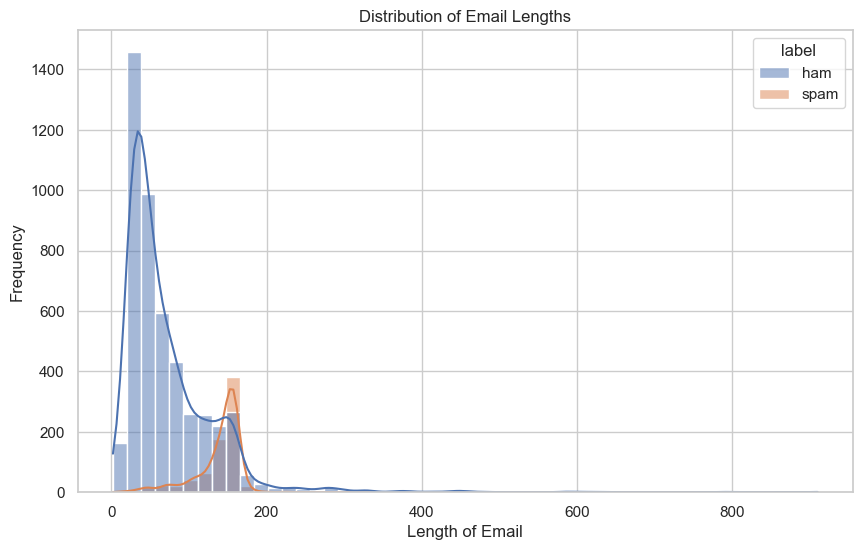

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid")

# Plotting the distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=spam_data_cleaned, x='length', hue='label', bins=50, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Length of Email')
plt.ylabel('Frequency')
plt.show()


#  Box Plot of Word Counts

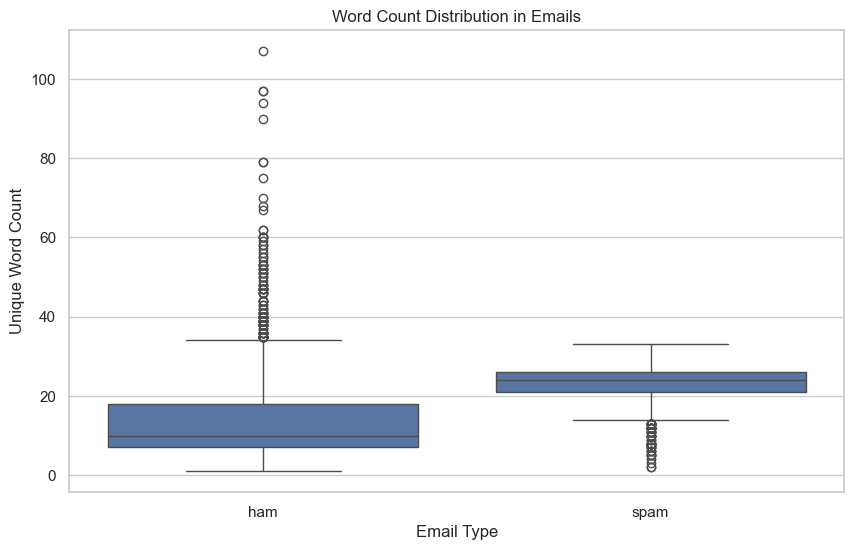

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='num_unique_words', data=spam_data_cleaned)
plt.title('Word Count Distribution in Emails')
plt.xlabel('Email Type')
plt.ylabel('Unique Word Count')
plt.show()


# Count of Special Characters

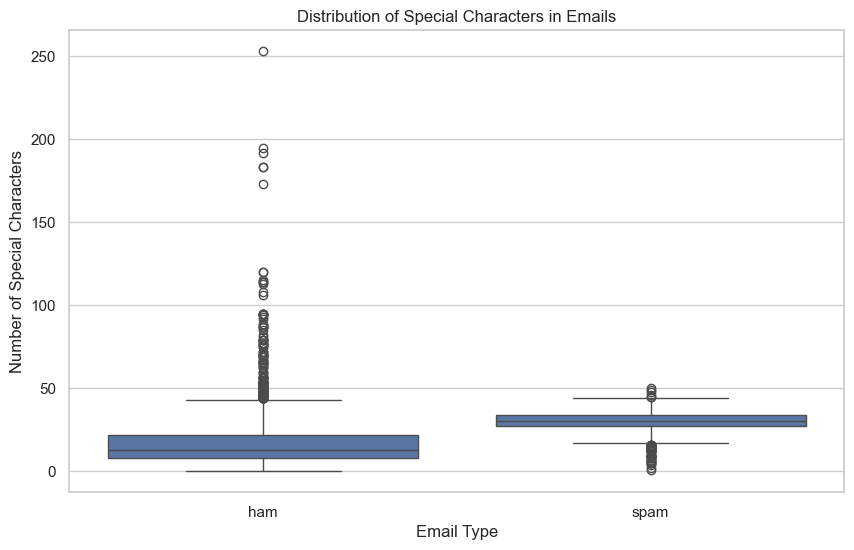

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='num_special_chars', data=spam_data_cleaned)
plt.title('Distribution of Special Characters in Emails')
plt.xlabel('Email Type')
plt.ylabel('Number of Special Characters')
plt.show()


# Bar Plot of Capital Letters Ratio

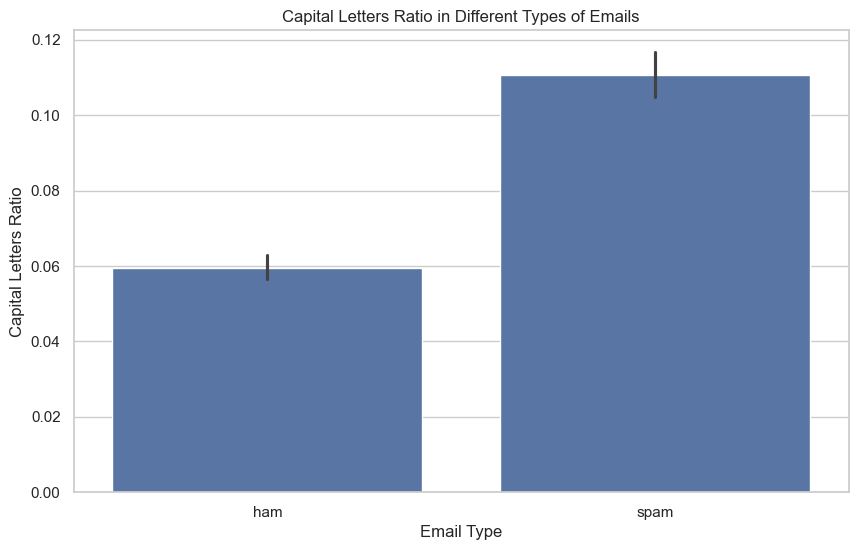

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='capitals_ratio', data=spam_data_cleaned)
plt.title('Capital Letters Ratio in Different Types of Emails')
plt.xlabel('Email Type')
plt.ylabel('Capital Letters Ratio')
plt.show()


# Number of URLs in Emails

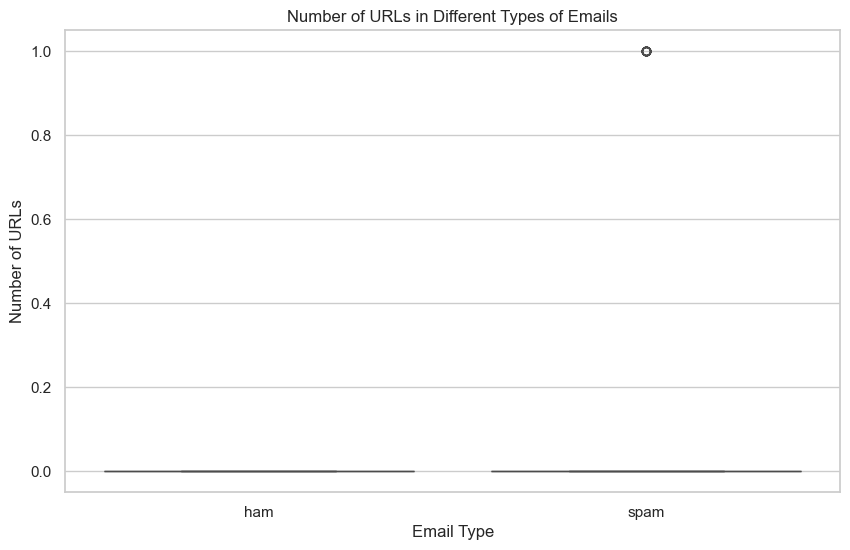

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='num_urls', data=spam_data_cleaned)
plt.title('Number of URLs in Different Types of Emails')
plt.xlabel('Email Type')
plt.ylabel('Number of URLs')
plt.show()
